## Install / Import

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


## Data Collection

In [111]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Load NHANES datasets
# files = {
#     "DEMO_L": "DEMO_L.XPT",     # Demographics
#     "HOQ_L": "HOQ_L.XPT",       # Housing
#     "INQ_L": "INQ_L.XPT",       # Total Savings
#     "BMX_L": "BMX_L.XPT",       # BMI
#     "BPXO_L": "BPXO_L.XPT",     # Blood pressure
#     "TCHOL_L": "TCHOL_L.XPT",   # Cholesterol
#     "GLU_L": "GLU_L.XPT",       # Glucose
#     "INS_L": "INS_L.XPT",       # Insulin
#     "HSCRP_L": "HSCRP_L.XPT",   # High-sensitivity C-reactive protein
#     "GHB_L": "GHB_L.XPT",       # Glycohemoglobin
#     "FERTIN_L": "FERTIN_L.XPT", # Ferritin
#     "FOLATE": "FOLATE_L.XPT",    # RBC Folate

#     "DIQ_L": "DIQ_L.XPT",       # Diabetes
#     "HEPA_L": "HEPA_L.XPT",     # Hepatitis A
#     "HEQ_L": "HEQ_L.XPT",       # Hepatitis B
#     "HSQ_L": "HSQ_L.XPT",       # HIV
#     "KIQ_U_L": "KIQ_U_L.XPT",   # Weak Failing Kidneys
#     "MCQ_L": "MCQ_L.XPT",       # Disease, ..., etc.
#     "RXQ_RX_L": "RXQ_RX_L.XPT", # Taken Prescription Medicine
# }

# dataframes = {name: pd.read_sas(f"{filename}", format="xport") for name, filename in files.items()}

# # Merge datasets on 'SEQN', avoiding the column 'WTPH2YR_x'
# df = dataframes["DEMO_L"]
# for name, df_other in dataframes.items():
#     if name != "DEMO_L":
#         df_other = df_other.drop(columns=["WTPH2YR"], errors='ignore')
#         df = df.merge(df_other, on="SEQN", how="outer")

# # Select relevant columns
# selected_columns = [
#     "SEQN", "RIDAGEYR", "RIAGENDR", "DMDEDUC2", "INDFMPIR",  # Demographics (DEMO_L)
#     "HOD051",                       # Housing (HOQ_L)
#     "IND310",                       # Total savings (INQ_L)
#     # "OCD150",                     # Occupational (OCQ_L)
#     "BMXBMI", "BMXWAIST",           # BMI (BMX_L)
#     "BPXOSY1", "BPXODI1",           # Blood pressure (BPXO_L)
#     "LBXTC", #"LBXHDL", "LBXLDL",    # Cholesterol (TCHOL_L)
#     "LBXGLU",                       # Glucose (GLU_L)
#     "LBXIN",                       # Insulin (INS_L)
#     "LBXHSCRP",                     # High-sensitivity C-reactive protein (HSCRP_L)
#     "LBXGH",                        # Glycohemoglobin (GHB_L)
#     "LBXFER",                       # Ferritin (FERTIN_L)
#     "LBDRFOSI",                      # RBC Folate (FOLATE)
    
#     "DIQ010", # Diabetes (DIQ_L)
#     "MCQ010", "MCQ160B", "MCQ160C", "MCQ160E", "MCQ160M", "MCQ160P", "MCQ160L", "MCQ550", "MCQ220", # Disease (MCQ_L) 
#     "HSQ590", # HIV (HSQ_L)
#     "LBXHA", # Hepatitis A (HEPA_L)
#     "HEQ010", # Hepatitis B (HEQ_L)
#     "KIQ022", # Kidney (KIQ_U_L)
#     "RXQ033" # Prescription (RXQ_RX_L)
# ]
# df = df[[col for col in selected_columns if col in df.columns]]

# # Convert non-numeric columns to NaN before computing median
# for col in df.columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# # Handle missing values: Fill NaNs with column medians
# df.fillna(df.median(), inplace=True)

# # # Normalize numerical features for clustering
# # numeric_features = ["BMXBMI", "BMXWAIST", "BPXSY1", "BPXDI1", "LBXGLU", "LBXINS", "LBXHSCRP", "LBXTC"]
# # numeric_features = [col for col in numeric_features if col in df.columns]
# # scaler = StandardScaler()
# # df[numeric_features] = scaler.fit_transform(df[numeric_features])

# # Save final dataset
# df.to_csv("NHANES_SES_BOTH_RawData.csv", index=False)
# print("Final dataset saved as 'NHANES_SES_BOTH_RawData.csv'")

## Data Exploration


In [112]:
file = "NHANES_SES_BOTH_RawData.csv"
df = pd.read_csv(file)

In [113]:
df.shape

(11933, 33)

In [114]:
df.head()

,SEQN,RIDAGEYR,RIAGENDR,DMDEDUC2,INDFMPIR,HOD051,IND310,BMXBMI,BMXWAIST,BPXOSY1,...,MCQ160M,MCQ160P,MCQ160L,MCQ550,MCQ220,HSQ590,LBXHA,HEQ010,KIQ022,RXQ033
0,130378.0,43.0,1.0,5.0,5.00,10.0,1.0,27.0,98.3,135.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1,130379.0,66.0,1.0,5.0,5.00,9.0,1.0,33.5,114.7,121.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
2,130380.0,44.0,2.0,3.0,1.41,6.0,1.0,29.7,93.5,111.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
3,130381.0,5.0,2.0,4.0,1.53,4.0,1.0,23.8,70.4,117.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
4,130382.0,2.0,1.0,4.0,3.60,8.0,1.0,26.4,92.7,117.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0


In [115]:
df.columns

Index(['SEQN', 'RIDAGEYR', 'RIAGENDR', 'DMDEDUC2', 'INDFMPIR', 'HOD051',
       'IND310', 'BMXBMI', 'BMXWAIST', 'BPXOSY1', 'BPXODI1', 'LBXTC', 'LBXGLU',
       'LBXIN', 'LBXHSCRP', 'LBXGH', 'LBXFER', 'LBDRFOSI', 'DIQ010', 'MCQ010',
       'MCQ160B', 'MCQ160C', 'MCQ160E', 'MCQ160M', 'MCQ160P', 'MCQ160L',
       'MCQ550', 'MCQ220', 'HSQ590', 'LBXHA', 'HEQ010', 'KIQ022', 'RXQ033'],
      dtype='object')

In [116]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_counts = df[column].value_counts()
    print(f"Unique values in column '{column}': {unique_values}")
    print(f"Counts of unique values in column '{column}':\n{unique_counts}\n")

Unique values in column 'SEQN': [130378. 130379. 130380. ... 142308. 142309. 142310.]
Counts of unique values in column 'SEQN':
SEQN
142310.0    1
130378.0    1
130379.0    1
130380.0    1
130381.0    1
           ..
130395.0    1
130394.0    1
130393.0    1
130392.0    1
130391.0    1
Name: count, Length: 11933, dtype: int64

Unique values in column 'RIDAGEYR': [4.30000000e+01 6.60000000e+01 4.40000000e+01 5.00000000e+00
 2.00000000e+00 3.00000000e+00 6.50000000e+01 3.40000000e+01
 6.80000000e+01 2.70000000e+01 5.90000000e+01 3.10000000e+01
 3.30000000e+01 7.40000000e+01 3.90000000e+01 5.10000000e+01
 5.60000000e+01 6.70000000e+01 4.70000000e+01 2.60000000e+01
 1.80000000e+01 1.20000000e+01 7.30000000e+01 8.00000000e+01
 7.70000000e+01 4.00000000e+00 7.00000000e+00 1.60000000e+01
 6.10000000e+01 5.80000000e+01 5.30000000e+01 1.30000000e+01
 1.50000000e+01 1.90000000e+01 1.40000000e+01 1.10000000e+01
 5.40000000e+01 1.70000000e+01 5.00000000e+01 6.30000000e+01
 4.20000000e+01 4.1000000

### Renaming Columns 

In [117]:
# rename columns
df.columns = ['SEQN',
    'Age', 'Gender', 'Education', 'FamilyIncomeRatio', # Demographics
    'Housing', # Housing
    'TotalSavings', # Total Savings
    # 'Occupation', # Occupational
    'BMI', 'WaistCircumference', # BMI
    'SystolicBP', 'DiastolicBP', # Blood pressure
    'TotalCholesterol', # Cholesterol
    'FastingBloodGlucose', # Glucose
    'InsulinLevel', # Insulin
    'CRP', # High-sensitivity C-reactive protein
    'Glycohemoglobin', # Glycohemoglobin
    'Ferritin', # Ferritin
    'RBCFolate', # RBC Folate

    'Diabetes', # Diabetes
    'Asthma',
    'CongestiveHeartFailure', 'CoronaryHeartDisease', 'HeartAttack', 
    'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 'CancerOrMalignancy', # Disease
    'HIV', # HIV
    'HepatitisA', # Hepatitis A
    'HepatitisB', # Hepatitis B
    'WeakFailingKidney', # Kidney
    'TakenPrescriptionMedicine' # Prescription
]

# df.head()

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       11933 non-null  float64
 1   Age                        11933 non-null  float64
 2   Gender                     11933 non-null  float64
 3   Education                  11933 non-null  float64
 4   FamilyIncomeRatio          11933 non-null  float64
 5   Housing                    11933 non-null  float64
 6   TotalSavings               11933 non-null  float64
 7   BMI                        11933 non-null  float64
 8   WaistCircumference         11933 non-null  float64
 9   SystolicBP                 11933 non-null  float64
 10  DiastolicBP                11933 non-null  float64
 11  TotalCholesterol           11933 non-null  float64
 12  FastingBloodGlucose        11933 non-null  float64
 13  InsulinLevel               11933 non-null  flo

## Data cleaning

Changes the values into 0 and 1 in preparation for feature engineering.
0 = no
1 = yes

In [119]:
disease_columns = ['Diabetes', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 'HeartAttack',
                   'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 'CancerOrMalignancy', 'HIV',
                     'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 'TakenPrescriptionMedicine']

# for col in disease_columns:
#     print(df[col].value_counts(), '\n')
for col in disease_columns:
    mode = df[col].mode()[0]
    df[col] = df[col].replace({3: mode, 7: mode, 9: mode, '.': mode})

# # make the 1 to 0 and 2 to 1 in diseases column

for col in disease_columns:
    df[col] = df[col].replace({2: 0})


In [120]:
nan_values = df.isna().sum()
print(nan_values)

SEQN                         0
Age                          0
Gender                       0
Education                    0
FamilyIncomeRatio            0
Housing                      0
TotalSavings                 0
BMI                          0
WaistCircumference           0
SystolicBP                   0
DiastolicBP                  0
TotalCholesterol             0
FastingBloodGlucose          0
InsulinLevel                 0
CRP                          0
Glycohemoglobin              0
Ferritin                     0
RBCFolate                    0
Diabetes                     0
Asthma                       0
CongestiveHeartFailure       0
CoronaryHeartDisease         0
HeartAttack                  0
ThyroidProblem               0
Emphysema                    0
LiverCondition               0
Gallstone                    0
CancerOrMalignancy           0
HIV                          0
HepatitisA                   0
HepatitisB                   0
WeakFailingKidney            0
TakenPre

Using the column's mean  to replace "don't know" and "missing" values 

In [121]:

df['Housing'] = df['Housing'].replace({77: np.nan, 99: np.nan, '.': np.nan})
df['Housing'].fillna(df['Housing'].mean(), inplace=True)
df['Education'] = df['Education'].replace({7: np.nan, 9: np.nan, '.': np.nan})
df['Education'].fillna(df['Housing'].mean(), inplace=True)

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\24835333.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Housing'].fillna(df['Housing'].mean(), inplace=True)
C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\24835333.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

## Feature Engineering 

Grouping the morbidity cases into a single column.
This is basically the total number of disease each participant has at the time of NHANSE questioning.

In [122]:

# Sum all disease-related columns to create a health score
df['MorbidityScore'] = df[['Diabetes', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 
                            'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 
                            'CancerOrMalignancy', 'HIV', 'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 
                            'TakenPrescriptionMedicine']].sum(axis=1)

# Drop individual disease columns to avoid redundancy
df = df.drop(columns=['Diabetes', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 
                      'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 
                      'CancerOrMalignancy', 'HIV', 'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 
                      'TakenPrescriptionMedicine'])


Dropping uneccessary columns base on related literatures. "TotalSavings" has the same values as FamilyIncome" .

In [123]:
df.drop(columns=['SEQN', 'Age', 'Gender', 'TotalSavings'], inplace=True)

## Scaling the Dataset

In [124]:
# scaler = MinMaxScaler()
scaler = StandardScaler()

# tried both of them but the result is the same

df_scaled = scaler.fit_transform(df)

# Convert back to a DataFrame with the original column names
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [125]:
df_scaled.head()

,Education,FamilyIncomeRatio,Housing,BMI,WaistCircumference,SystolicBP,DiastolicBP,TotalCholesterol,FastingBloodGlucose,InsulinLevel,CRP,Glycohemoglobin,Ferritin,RBCFolate,Asthma,MorbidityScore
0,1.221757,1.528649,2.292740,-0.000150,0.328295,1.120929,2.702145,2.607340,0.575387,0.306911,-0.154200,-0.022398,-0.111845,-1.010082,0.344229,0.050397
1,1.221757,1.528649,1.777593,0.946435,1.226010,0.173190,1.220287,1.054528,-0.186442,0.612141,-0.110253,-0.022398,-0.111845,-0.453051,0.344229,0.775830
2,-0.939576,-0.829251,0.232152,0.393047,0.065550,-0.503766,0.691052,0.216009,2.915292,0.362661,0.520834,0.729419,-1.066215,-0.697196,0.344229,2.226695
3,0.141090,-0.750435,-0.798142,-0.466161,-1.198914,-0.097592,-0.049877,-0.063497,-0.132026,-0.104245,-0.212211,-0.147700,-0.111845,-0.175721,0.344229,0.050397
4,0.141090,0.609134,1.262446,-0.087527,0.021759,-0.097592,-0.049877,-0.063497,-0.132026,-0.104245,-0.212211,-0.147700,-0.637328,-0.175721,0.344229,-0.675036


## Dimensionality Reduction

### PCA

In [126]:
# kmeans = KMeans(n_clusters=2, random_state=42)
# df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

In [127]:
# df_scaled.head(10)

In [128]:
# pca = PCA(n_components=3)
# pca.fit(df_scaled)

# PCA_ds = pd.DataFrame(pca.transform(df_scaled), columns=(["col1","col2", "col3"]))
# PCA_ds.describe().T

pca = PCA(n_components=2)
pca.fit(df_scaled)

PCA_ds = pd.DataFrame(pca.transform(df_scaled), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,11933.0,-6.668967e-17,1.714634,-4.224191,-0.914474,-0.284680,0.782871,11.899682
col2,11933.0,-1.283181e-16,1.310779,-7.954568,-0.847709,-0.043733,0.865332,4.414840


In [129]:

explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

# PC3_explainedvariance = explained_variance[2]
# print("Explained variance of PC3", PC3_explainedvariance)

# loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=df_scaled.columns)
# loading_matrix

# loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df_scaled.columns)
# loading_matrix

Explained variance of PC1 0.18373271939962096
Explained variance of PC2 0.10737485056482048


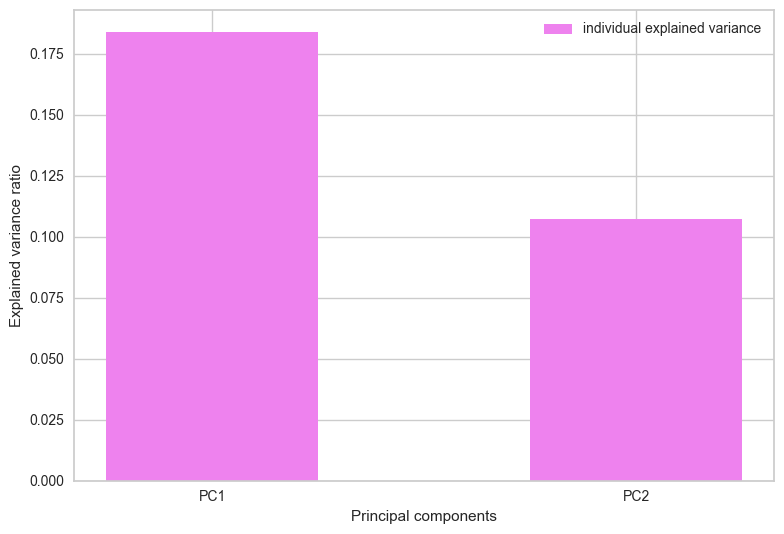

In [130]:
plt.figure()
principalcomponents = ['PC1', 'PC2']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

# plt.figure()
# principalcomponents = ['PC1', 'PC2', 'PC3']

# plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal components')
# plt.legend(loc='best')
# plt.tight_layout()

# plt.show()

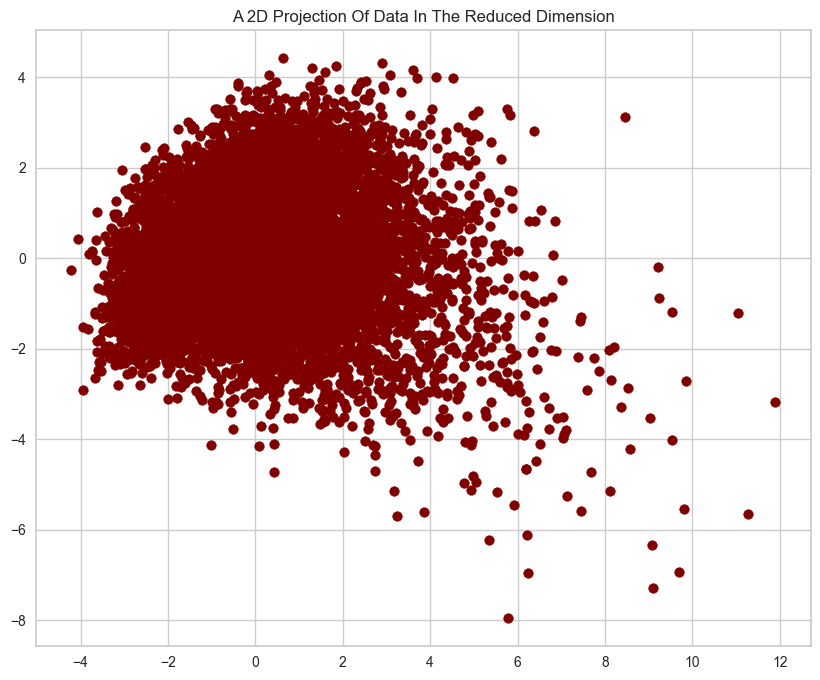

In [131]:
# A 2D Projection Of Data In The Reduced Dimension
x = PCA_ds["col1"]
y = PCA_ds["col2"]

# To plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.scatter(x, y, c="maroon", marker="o")
ax.set_title("A 2D Projection Of Data In The Reduced Dimension")
plt.show()

# #A 3D Projection Of Data In The Reduced Dimension
# x =PCA_ds["col1"]
# y =PCA_ds["col2"]
# z =PCA_ds["col3"]
# #To plot
# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(111, projection="3d")
# ax.scatter(x,y,z, c="maroon", marker="o" )
# ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
# plt.show()

In [132]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            11933 non-null  float64
 1   FamilyIncomeRatio    11933 non-null  float64
 2   Housing              11933 non-null  float64
 3   BMI                  11933 non-null  float64
 4   WaistCircumference   11933 non-null  float64
 5   SystolicBP           11933 non-null  float64
 6   DiastolicBP          11933 non-null  float64
 7   TotalCholesterol     11933 non-null  float64
 8   FastingBloodGlucose  11933 non-null  float64
 9   InsulinLevel         11933 non-null  float64
 10  CRP                  11933 non-null  float64
 11  Glycohemoglobin      11933 non-null  float64
 12  Ferritin             11933 non-null  float64
 13  RBCFolate            11933 non-null  float64
 14  Asthma               11933 non-null  float64
 15  MorbidityScore       11933 non-null 

### Other reduction method 

## K-Means

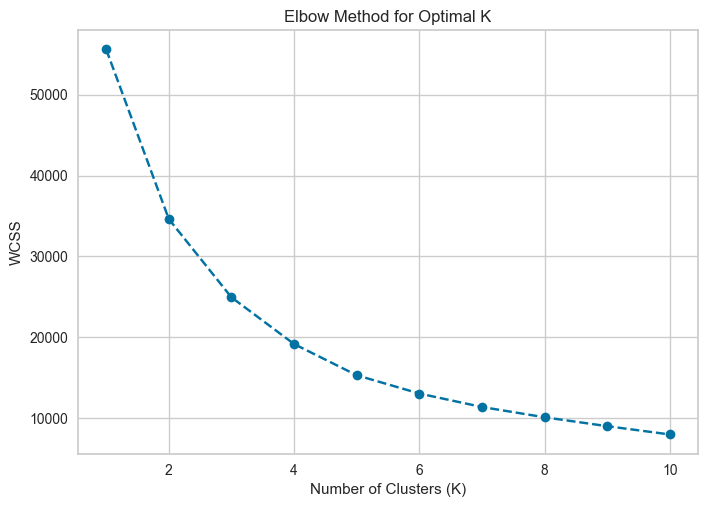

In [133]:
# try elbow method
 
wcss = []  # Store WCSS values

for k in range(1, 11):  # Test K from 1 to 10

    kmeans = KMeans(

        n_clusters=k, 
        #init='k-means++', #default
        #n_init=10, #default
        #max_iter=300, #default
        #tol=0.0001, #default
        #precompute_distances='auto', #default
        #verbose=0, #default
        #algorithm='lloyd', #default
        random_state=42, 
        n_init=10
    )
    kmeans.fit(PCA_ds)  # Use the standardized data
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

Note: you may need to restart the kernel to use updated packages.
Elbow Method to determine the number of clusters to be formed:


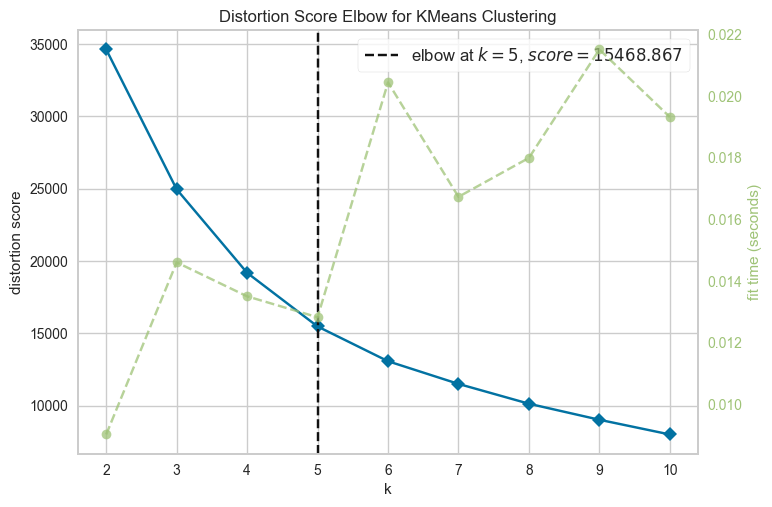

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [134]:
%pip install yellowbrick

from yellowbrick.cluster import KElbowVisualizer

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [135]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(

        n_clusters=5, 
        #init='k-means++', #default
        #n_init=10, #default
        #max_iter=300, #default
        #tol=0.0001, #default
        #precompute_distances='auto', #default
        #verbose=0, #default
        #algorithm='lloyd', #default
        random_state=42, 
        n_init=10
    )
y_kmeans = kmeans.fit(PCA_ds)
PCA_ds["Clusters"] = y_kmeans.labels_
df["Clusters"]= y_kmeans.labels_

print(f"The inertia score is : {kmeans.inertia_}")
silhouette_avg = silhouette_score(PCA_ds, kmeans.labels_)
print(f"The average silhouette score is : {silhouette_avg}")

The inertia score is : 15323.19091339311
The average silhouette score is : 0.49714060389890696


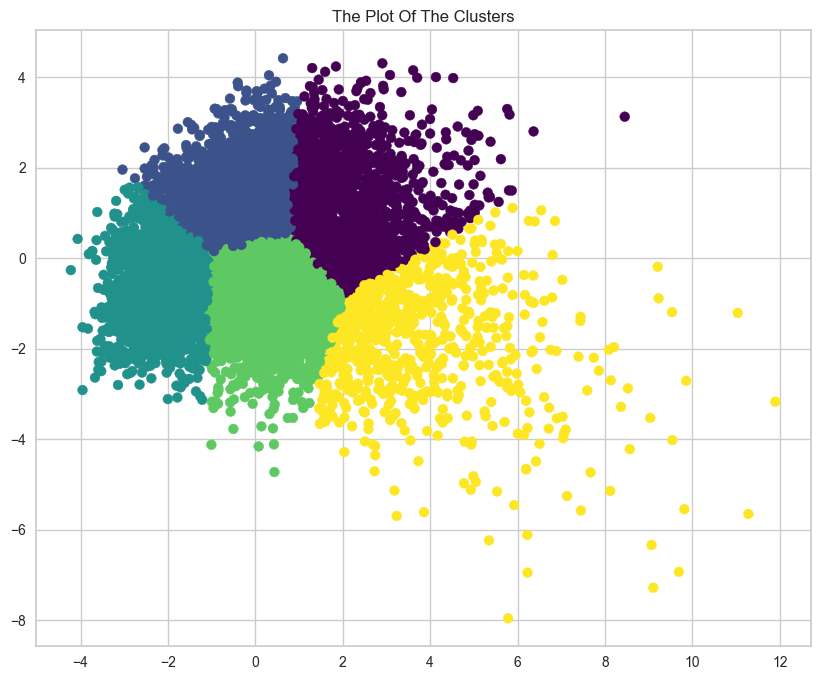

In [136]:
# #Plotting the clusters
# fig = plt.figure(figsize=(10,8))
# ax = plt.subplot(111, projection='3d', label="bla")
# ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap='viridis')
# ax.set_title("The Plot Of The Clusters")
# plt.show()

# Plotting the clusters in 2D
plt.figure(figsize=(10,8))
plt.scatter(PCA_ds["col1"], PCA_ds["col2"], c=PCA_ds["Clusters"], s=50, cmap='viridis')
plt.title("The Plot Of The Clusters")
plt.show()

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


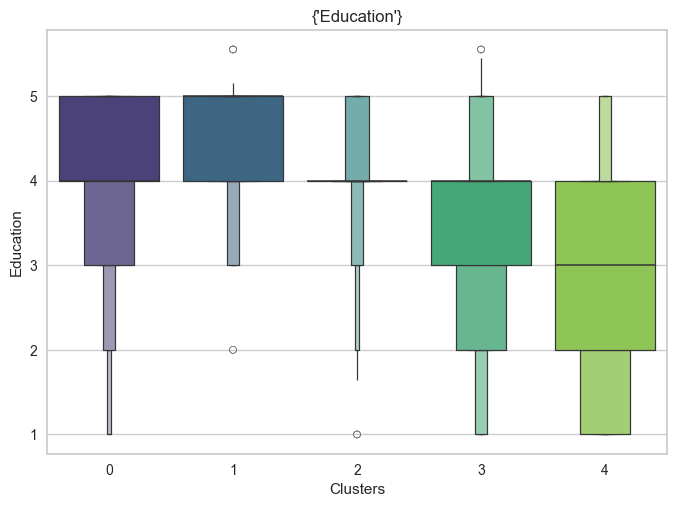

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


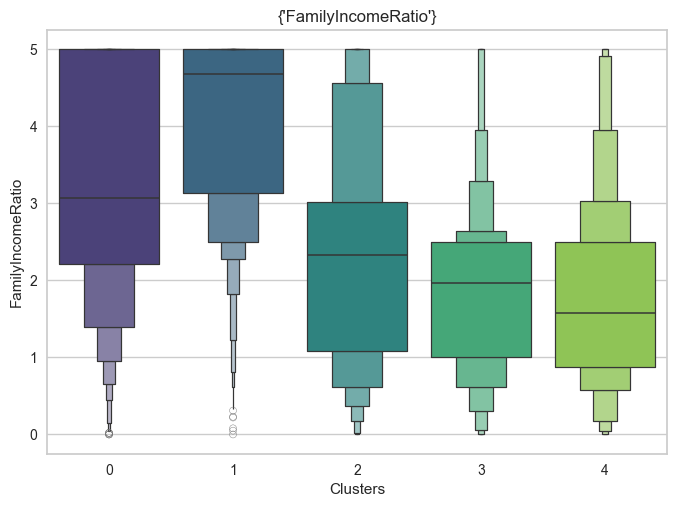

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


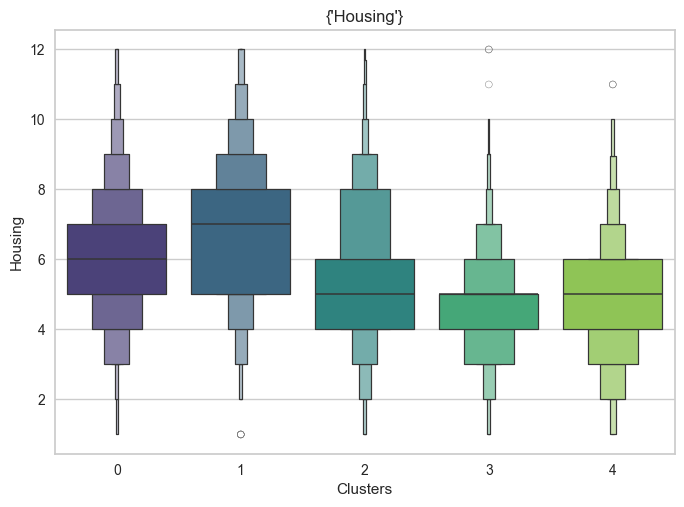

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


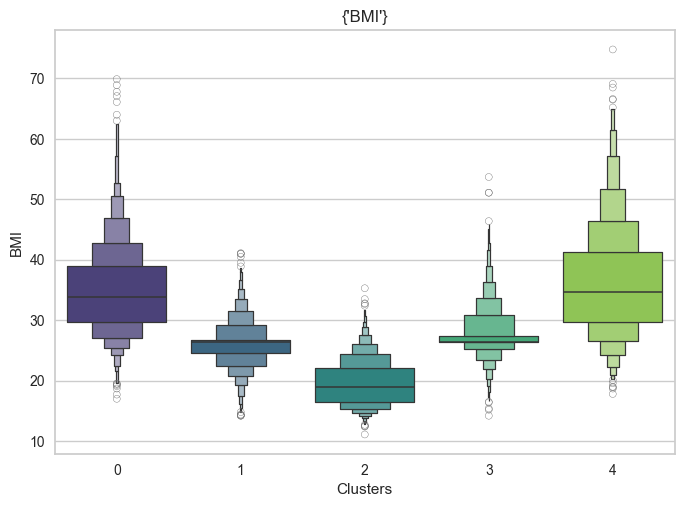

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


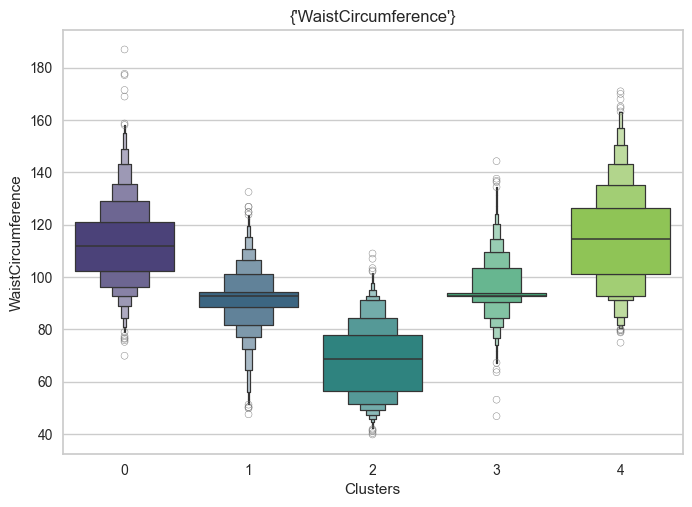

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


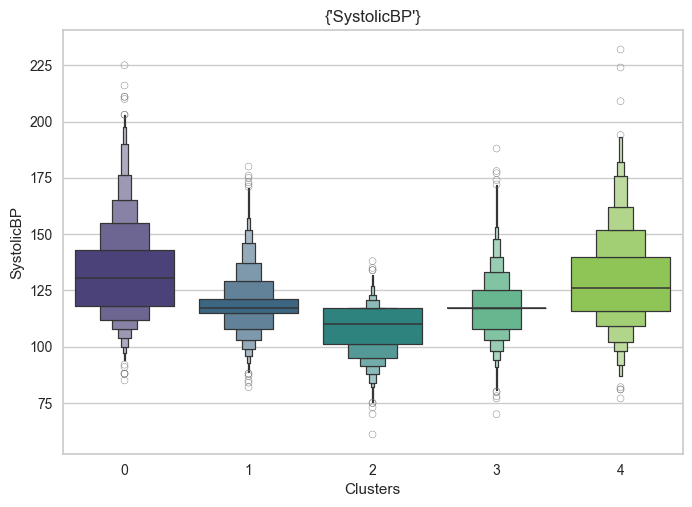

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


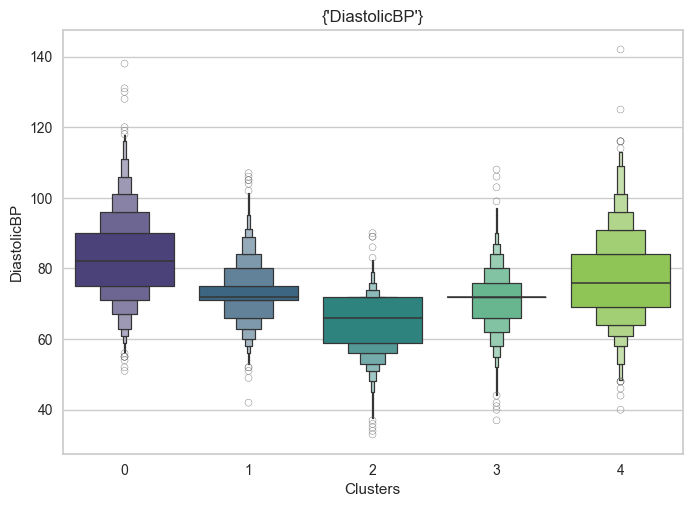

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


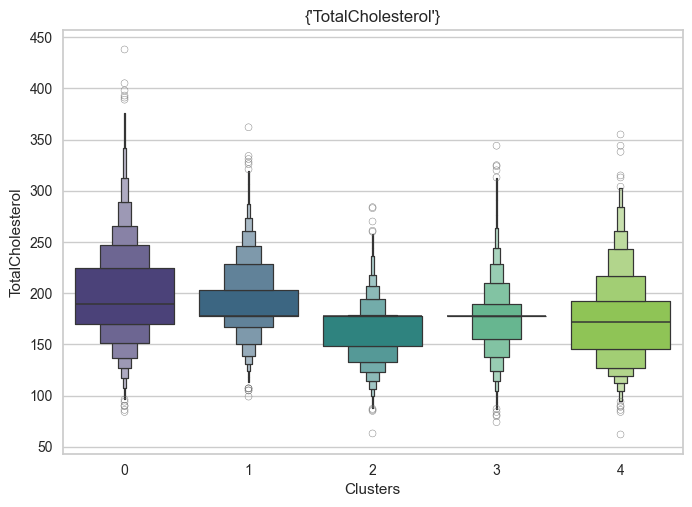

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


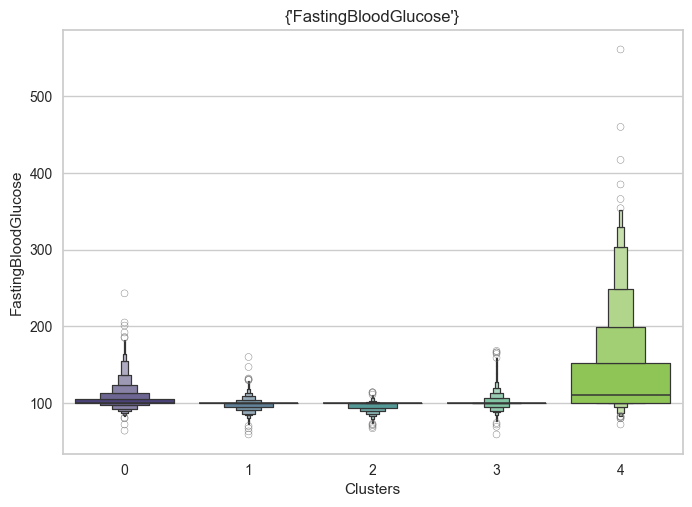

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


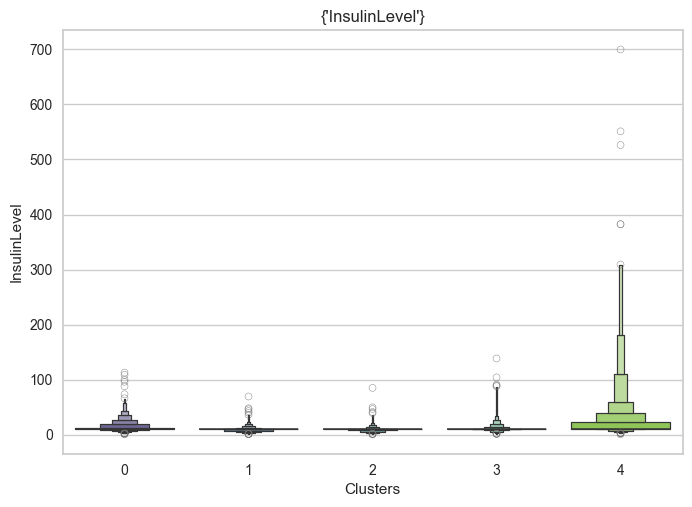

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


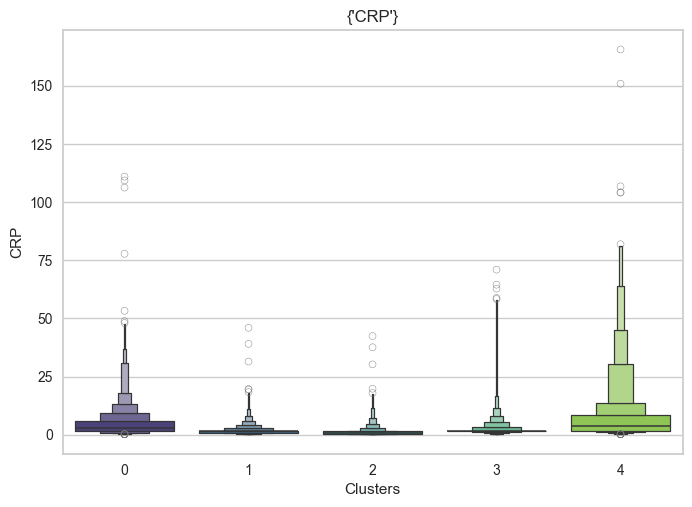

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


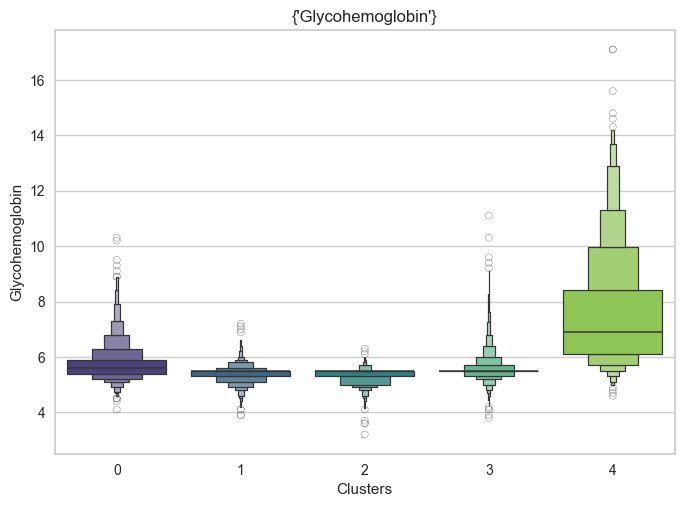

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


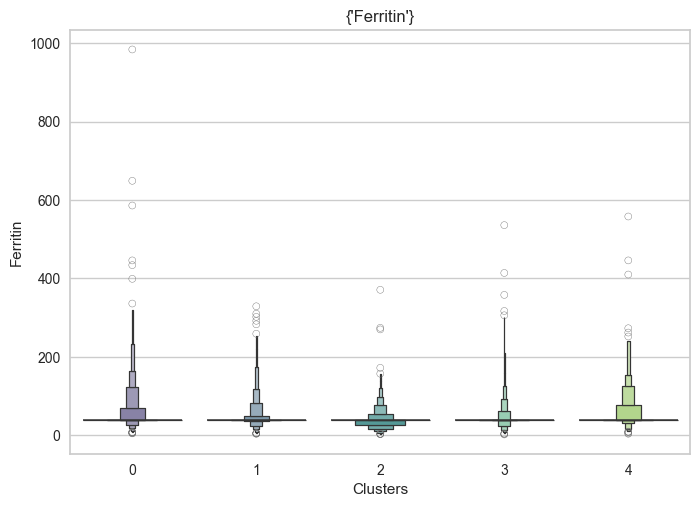

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


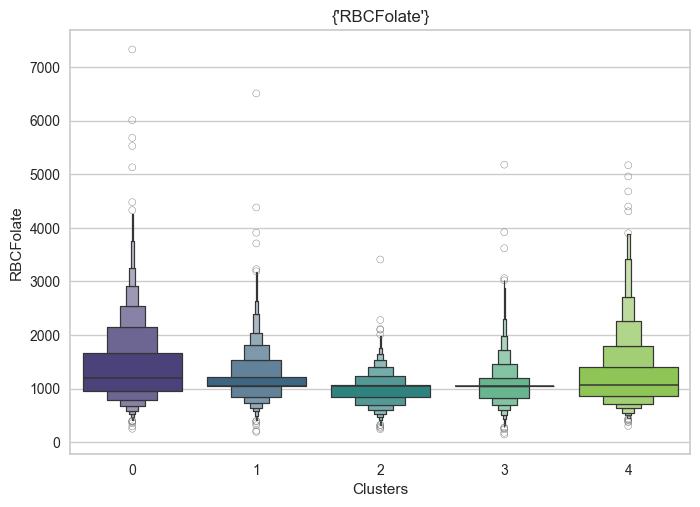

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


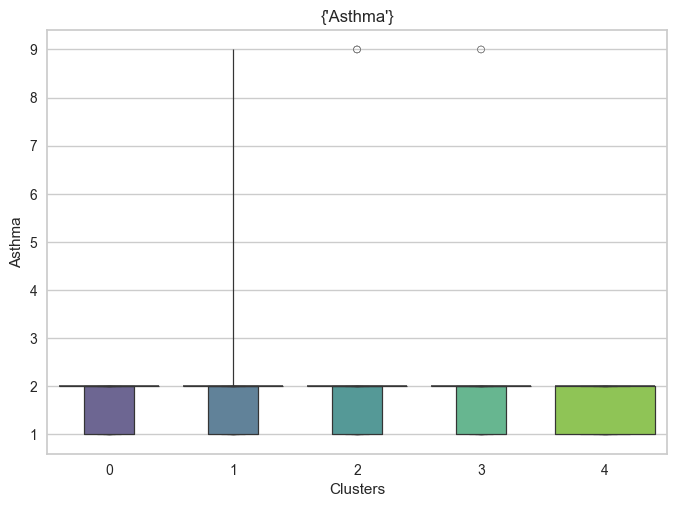

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


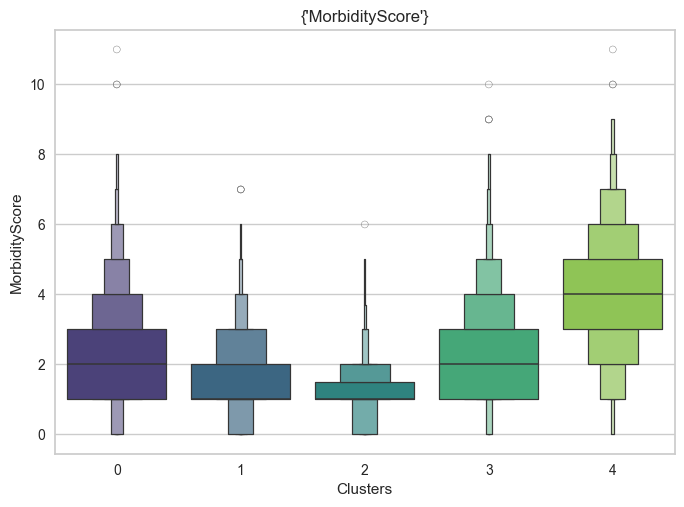

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\352111313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")


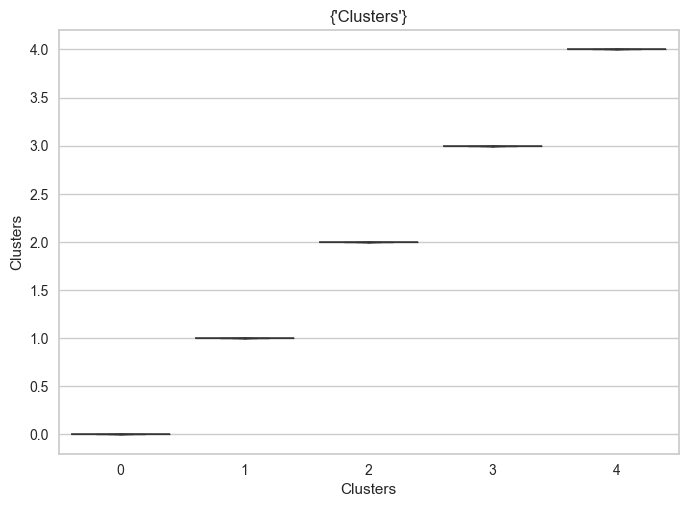

In [137]:
for col in df.columns:

  plt.figure()
  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= "viridis")
  pl.set_title({col})
  plt.show()

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\2545068837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.violinplot(y=df[col], x=df["Clusters"], palette="viridis")


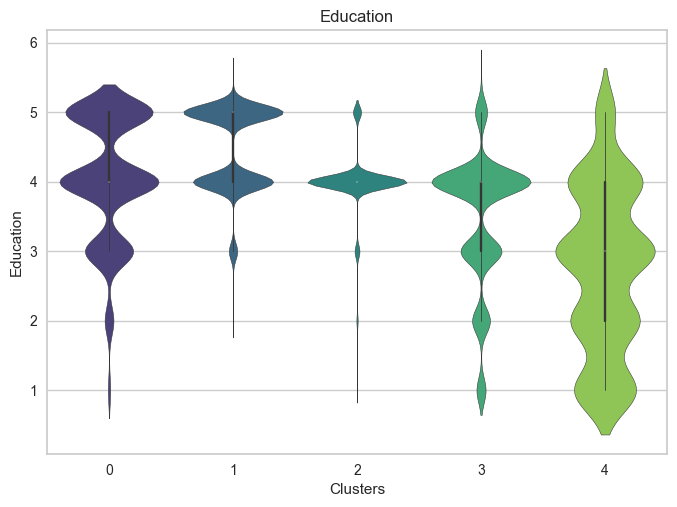

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\2545068837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.violinplot(y=df[col], x=df["Clusters"], palette="viridis")


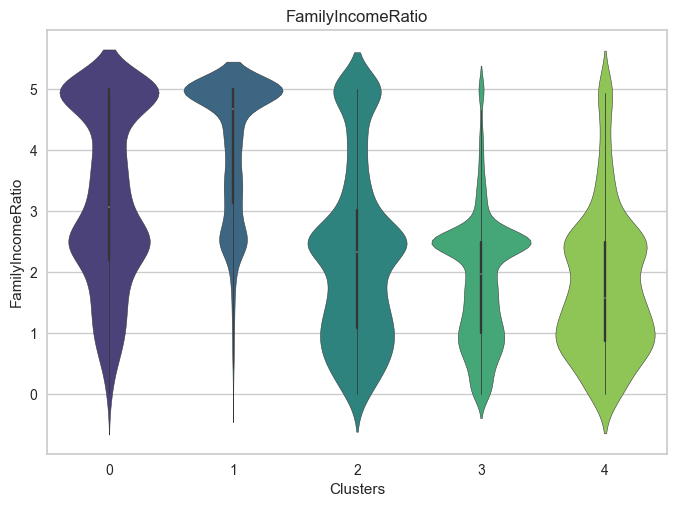

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\2545068837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.violinplot(y=df[col], x=df["Clusters"], palette="viridis")


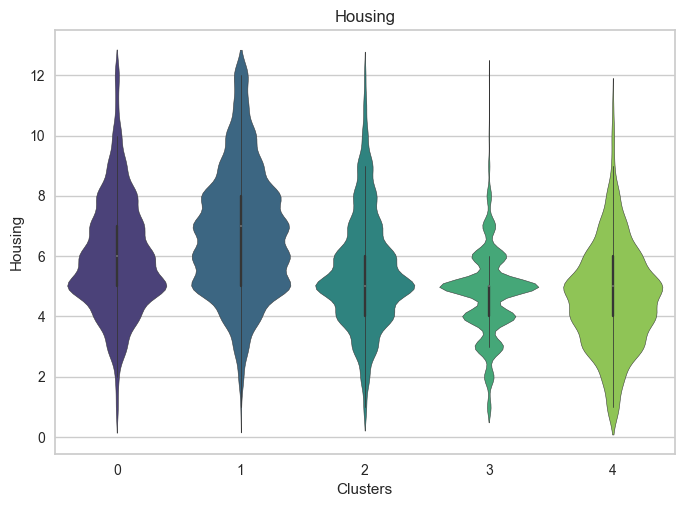

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\2545068837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.violinplot(y=df[col], x=df["Clusters"], palette="viridis")


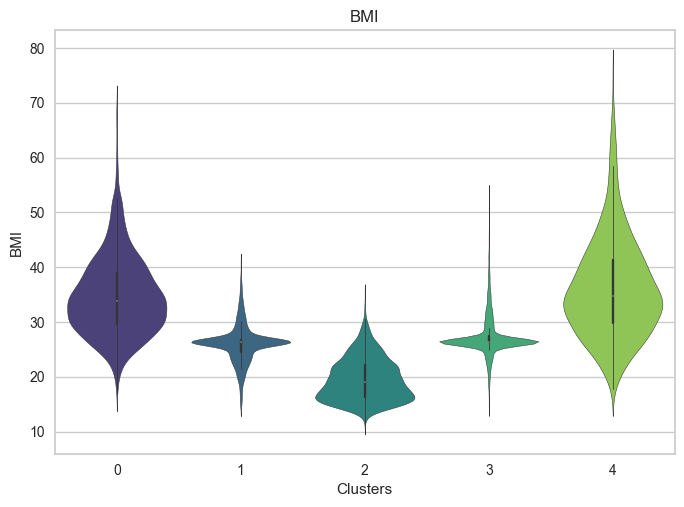

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\2545068837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.violinplot(y=df[col], x=df["Clusters"], palette="viridis")


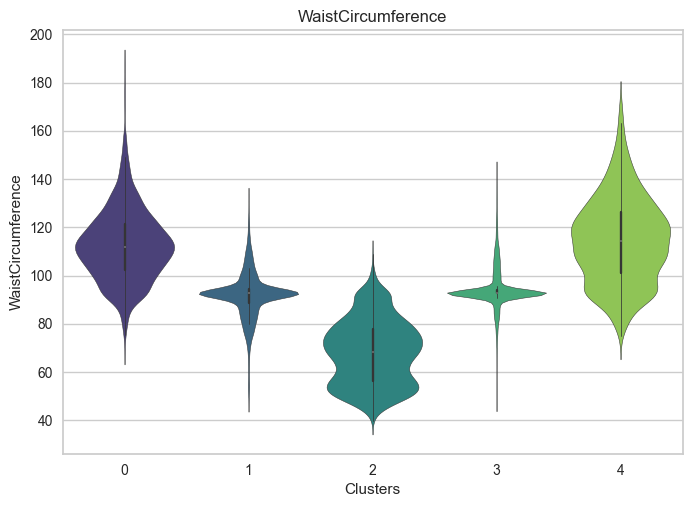

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\2545068837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.violinplot(y=df[col], x=df["Clusters"], palette="viridis")


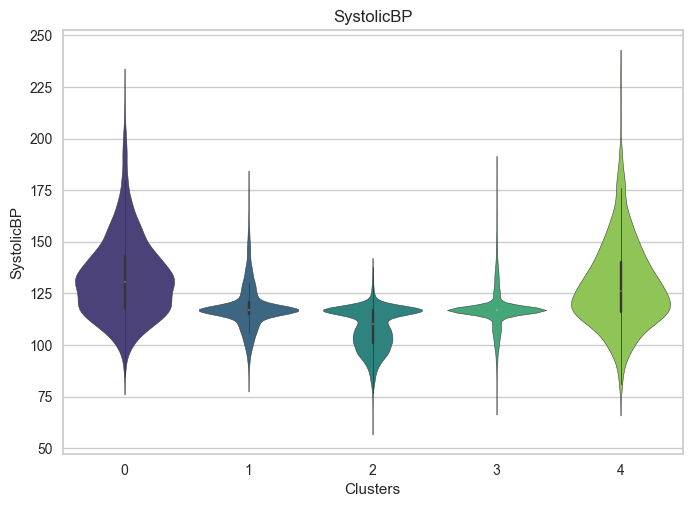

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\2545068837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.violinplot(y=df[col], x=df["Clusters"], palette="viridis")


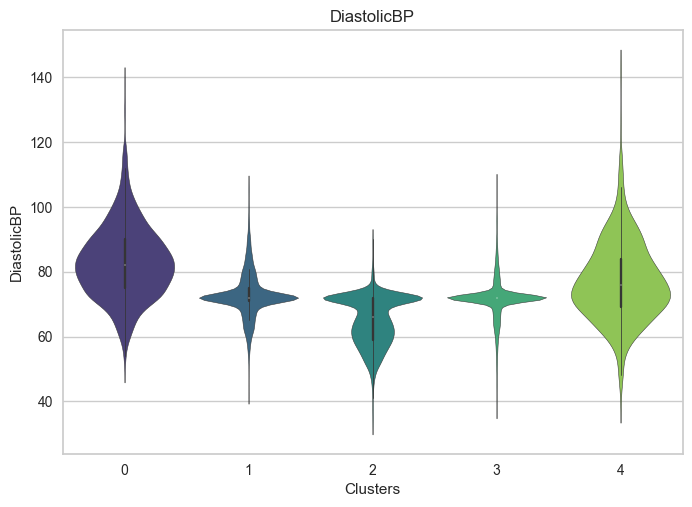

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\2545068837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.violinplot(y=df[col], x=df["Clusters"], palette="viridis")


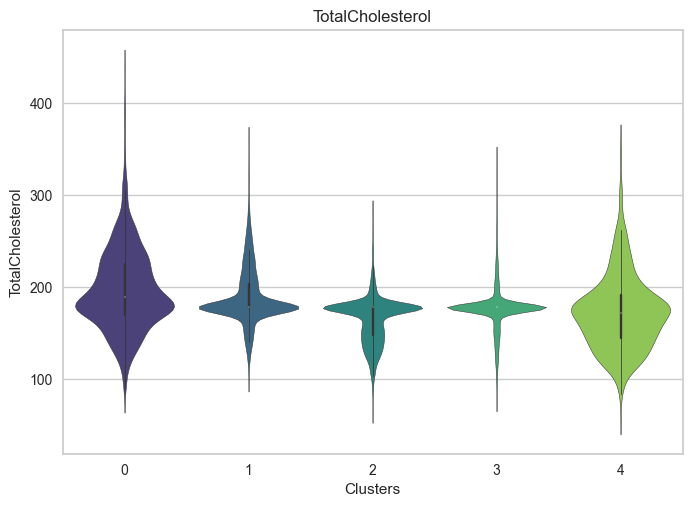

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\2545068837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.violinplot(y=df[col], x=df["Clusters"], palette="viridis")


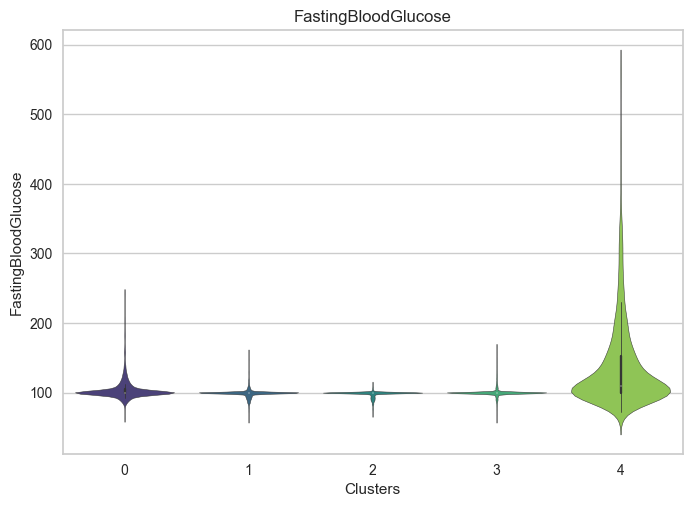

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\2545068837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.violinplot(y=df[col], x=df["Clusters"], palette="viridis")


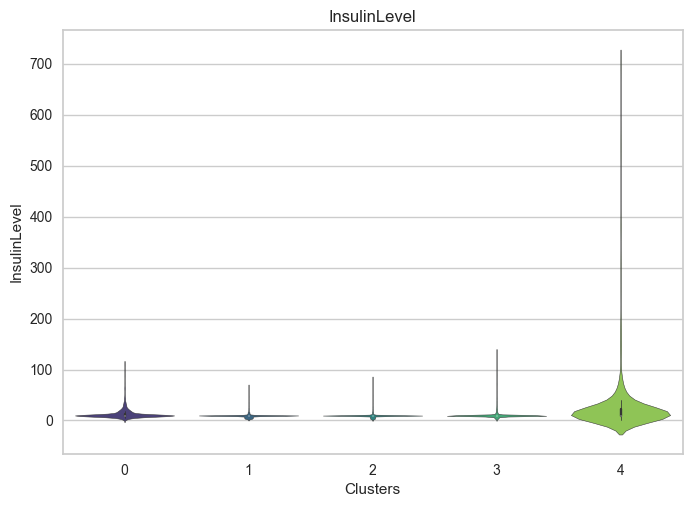

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\2545068837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.violinplot(y=df[col], x=df["Clusters"], palette="viridis")


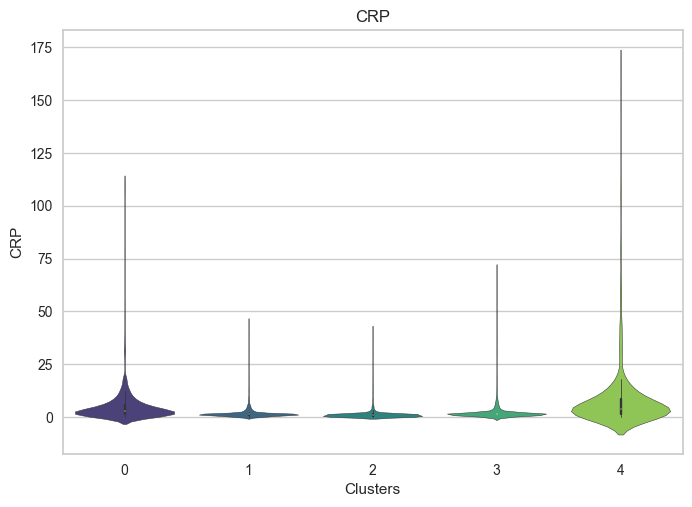

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\2545068837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.violinplot(y=df[col], x=df["Clusters"], palette="viridis")


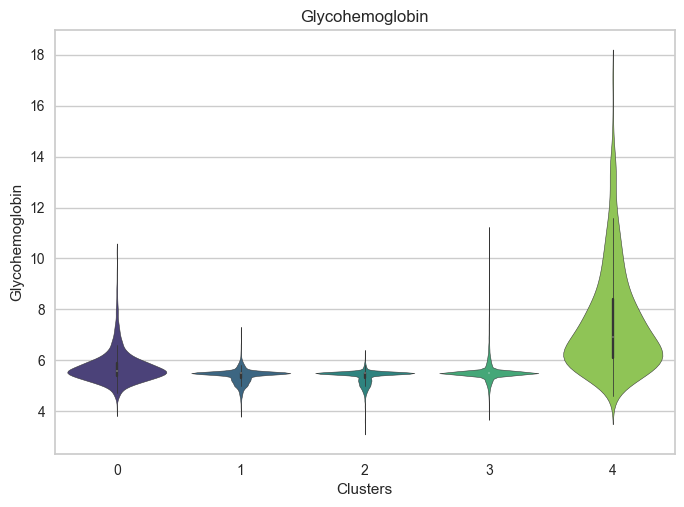

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\2545068837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.violinplot(y=df[col], x=df["Clusters"], palette="viridis")


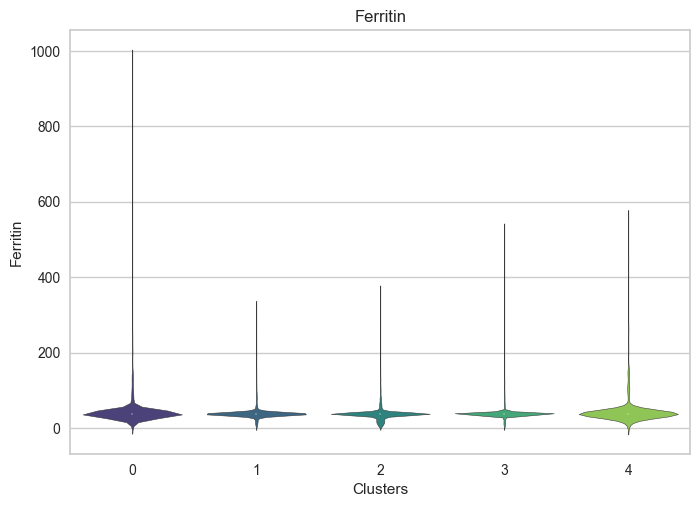

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\2545068837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.violinplot(y=df[col], x=df["Clusters"], palette="viridis")


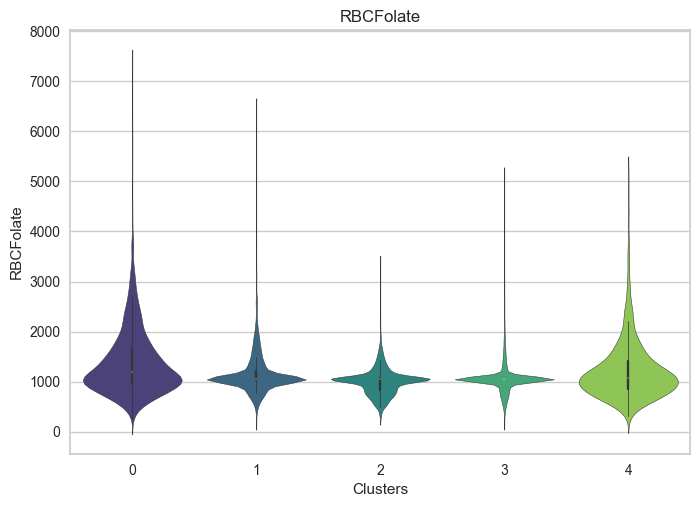

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\2545068837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.violinplot(y=df[col], x=df["Clusters"], palette="viridis")


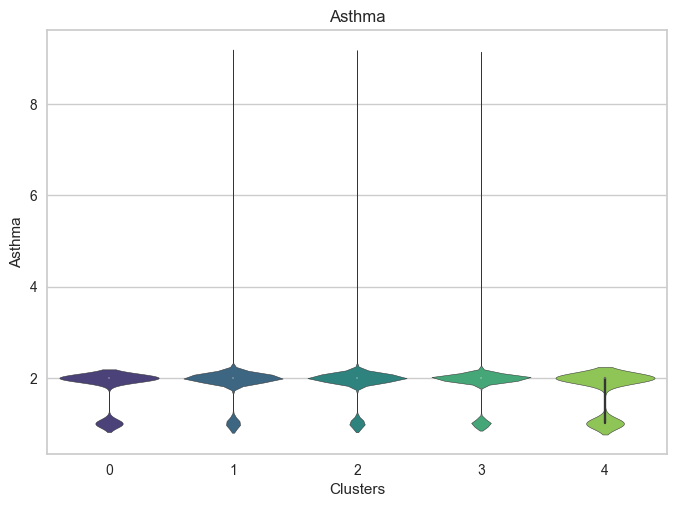

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\2545068837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.violinplot(y=df[col], x=df["Clusters"], palette="viridis")


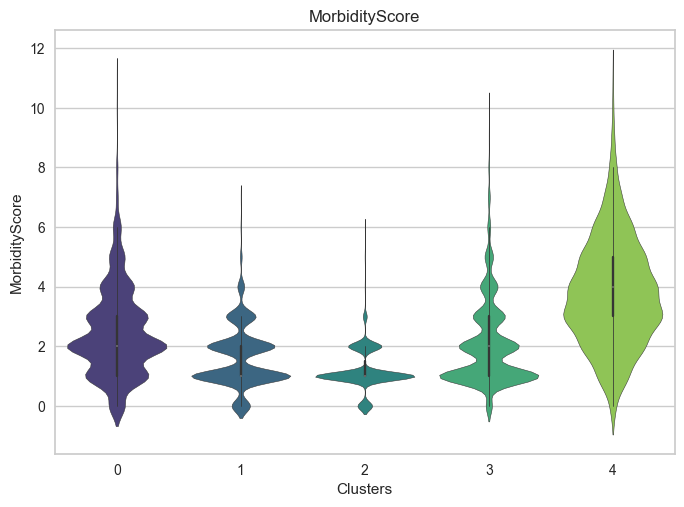

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\2545068837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.violinplot(y=df[col], x=df["Clusters"], palette="viridis")


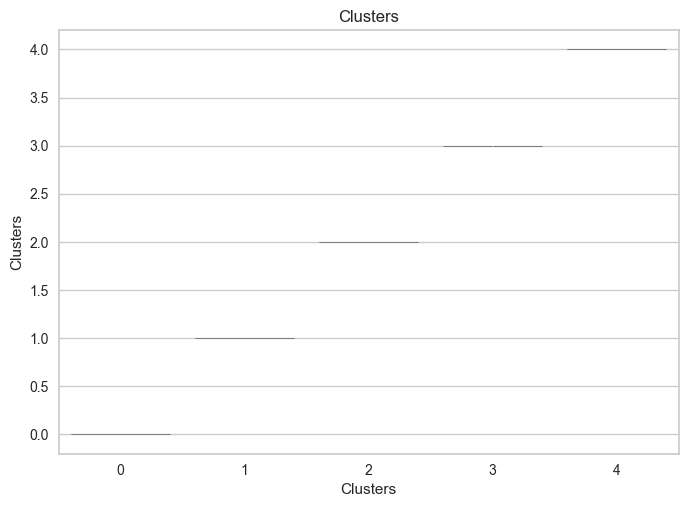

In [138]:
for col in df.columns:
  plt.figure()
  pl = sns.violinplot(y=df[col], x=df["Clusters"], palette="viridis")
  pl.set_title(col)
  plt.show()


## DB Scan

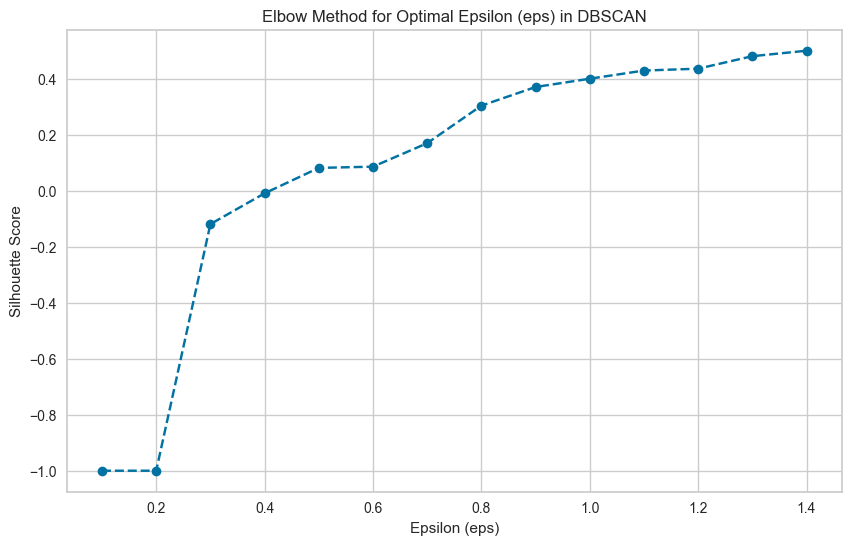

In [139]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define a range of eps values to test
eps_values = np.arange(0.1, 1.5, 0.1)
silhouette_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=1000)
    labels = dbscan.fit_predict(PCA_ds)
    
    # Calculate silhouette score only if more than one cluster is formed
    if len(set(labels)) > 1:
        score = silhouette_score(PCA_ds, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  # Invalid score for single cluster

# Plot the silhouette scores for different eps values
plt.figure(figsize=(10, 6))
plt.plot(eps_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method for Optimal Epsilon (eps) in DBSCAN')
plt.show()

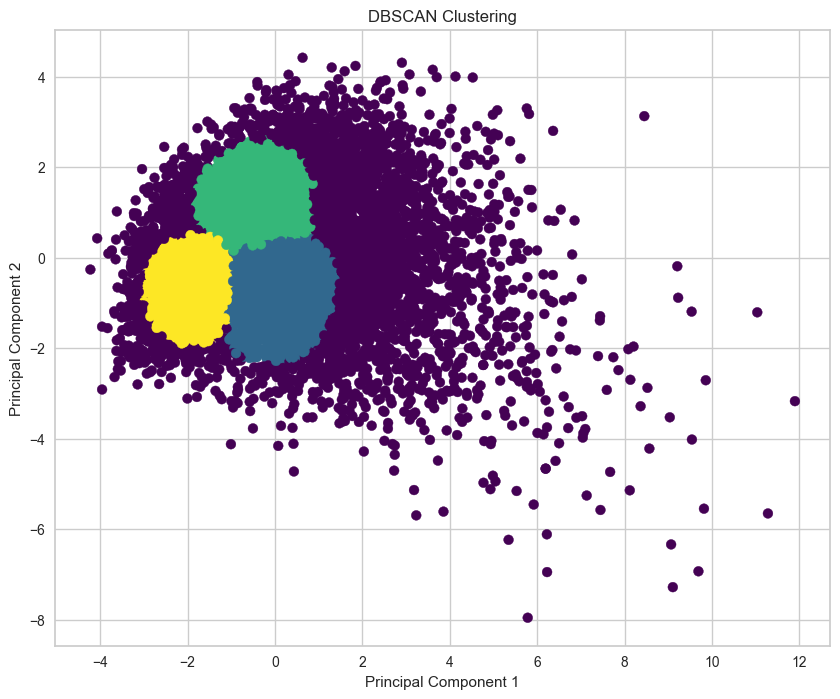

Number of clusters formed by DBSCAN: 4
The average silhouette score is : 0.4068165323140641


In [140]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(
    #parameters
    eps=0.8,    # The maximum distance between two samples for one to be considered as in the neighborhood of the other     
    min_samples=1000,
    #metric='euclidean', #default
    #algorithm='auto', #default
    leaf_size=20 #default = 30
    #p=None, #defaul
)
dbscan_labels = dbscan.fit_predict(PCA_ds)

# Add DBSCAN labels to the PCA dataframe
PCA_ds['DBSCAN_Cluster'] = dbscan_labels

# Plot the DBSCAN clusters
plt.figure(figsize=(10, 8))
plt.scatter(PCA_ds["col1"], PCA_ds["col2"], c=PCA_ds["DBSCAN_Cluster"], s=50, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#display the number of clusters formed
print(f"Number of clusters formed by DBSCAN: {len(set(dbscan_labels))}")

#display the silhouette score
silhouette_avg = silhouette_score(PCA_ds, dbscan_labels)
print(f"The average silhouette score is : {silhouette_avg}")


C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\1791201658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=df[col], x=PCA_ds["DBSCAN_Cluster"], palette="viridis")


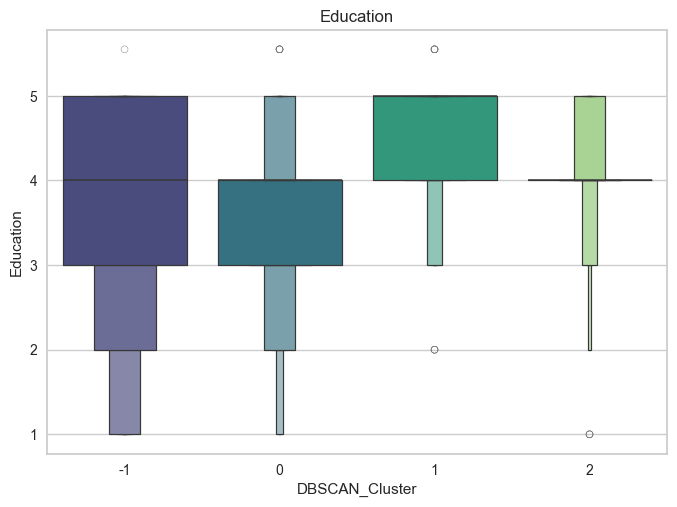

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\1791201658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=df[col], x=PCA_ds["DBSCAN_Cluster"], palette="viridis")


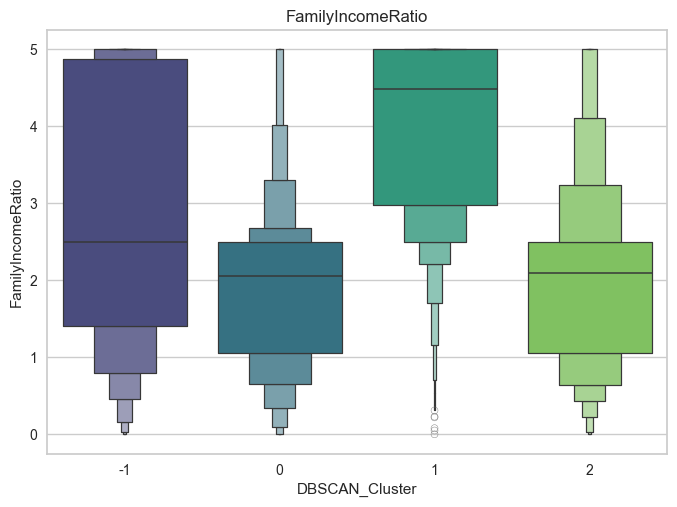

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\1791201658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=df[col], x=PCA_ds["DBSCAN_Cluster"], palette="viridis")


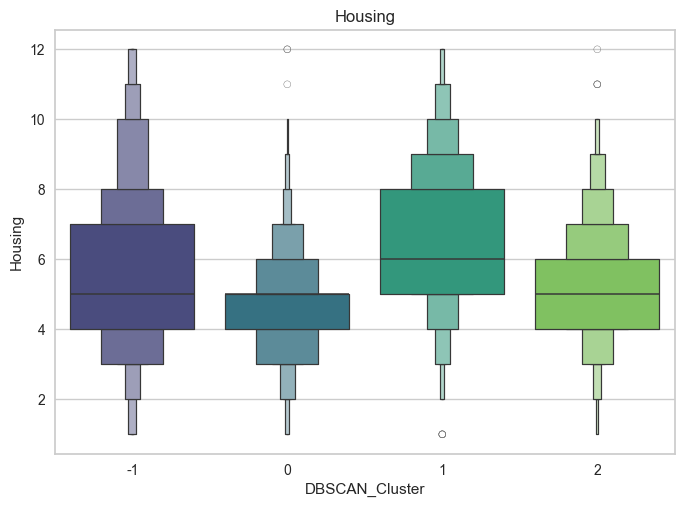

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\1791201658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=df[col], x=PCA_ds["DBSCAN_Cluster"], palette="viridis")


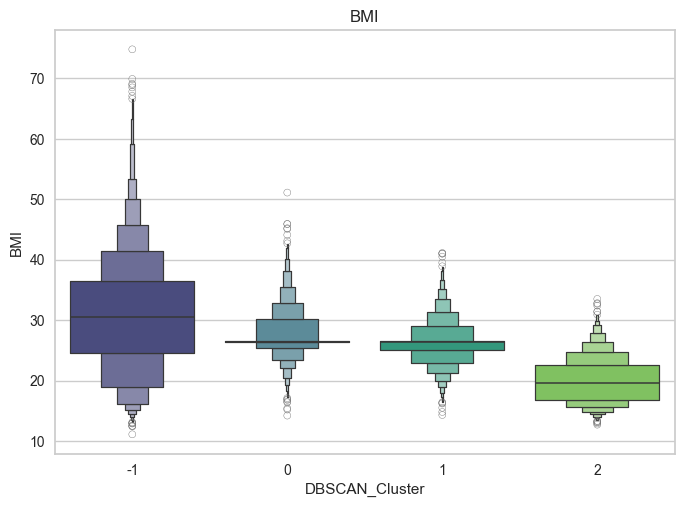

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\1791201658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=df[col], x=PCA_ds["DBSCAN_Cluster"], palette="viridis")


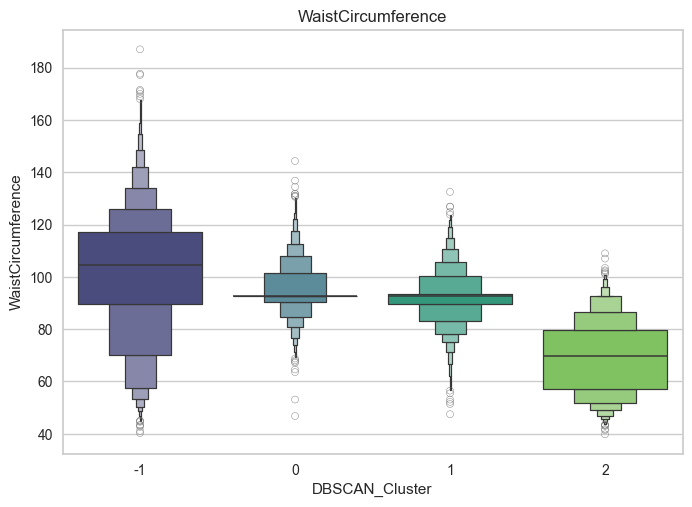

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\1791201658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=df[col], x=PCA_ds["DBSCAN_Cluster"], palette="viridis")


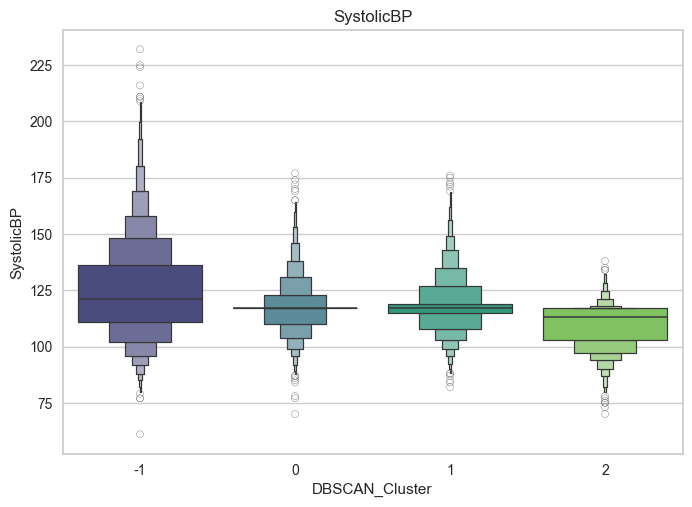

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\1791201658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=df[col], x=PCA_ds["DBSCAN_Cluster"], palette="viridis")


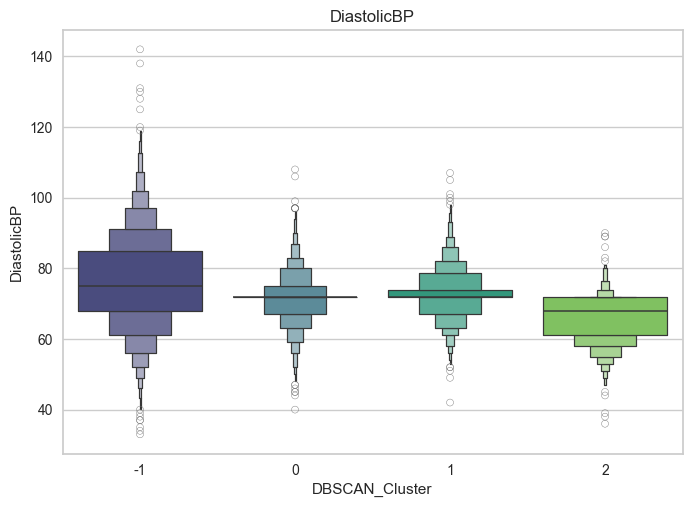

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\1791201658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=df[col], x=PCA_ds["DBSCAN_Cluster"], palette="viridis")


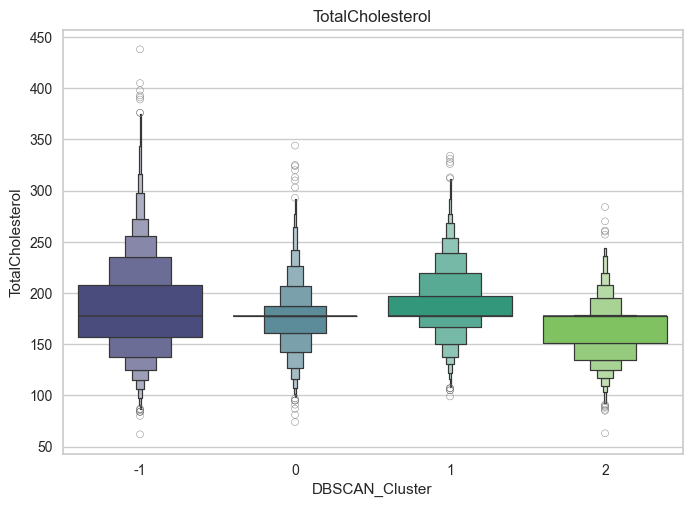

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\1791201658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=df[col], x=PCA_ds["DBSCAN_Cluster"], palette="viridis")


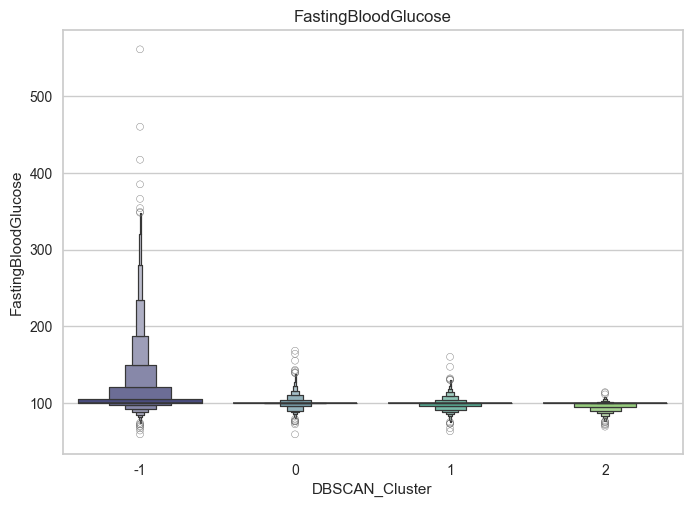

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\1791201658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=df[col], x=PCA_ds["DBSCAN_Cluster"], palette="viridis")


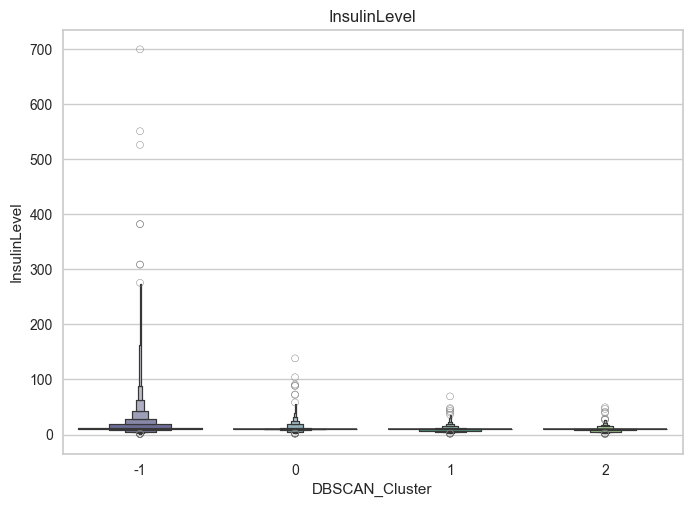

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\1791201658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=df[col], x=PCA_ds["DBSCAN_Cluster"], palette="viridis")


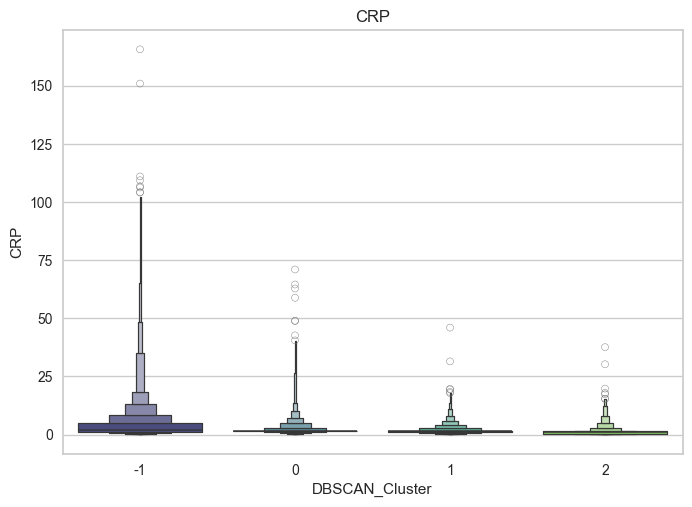

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\1791201658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=df[col], x=PCA_ds["DBSCAN_Cluster"], palette="viridis")


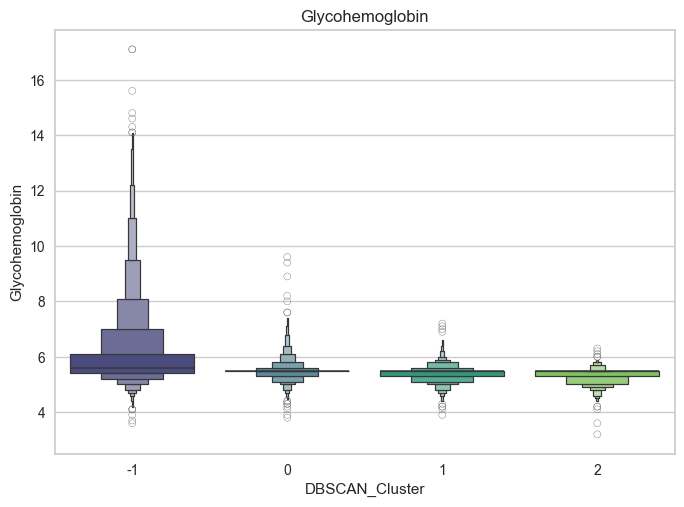

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\1791201658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=df[col], x=PCA_ds["DBSCAN_Cluster"], palette="viridis")


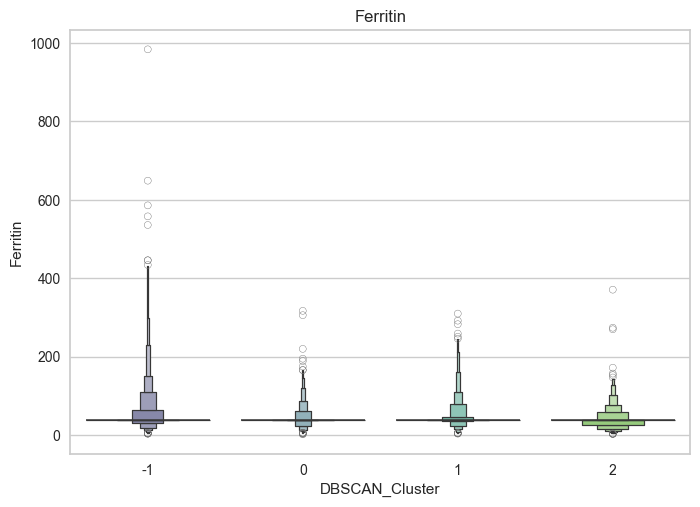

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\1791201658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=df[col], x=PCA_ds["DBSCAN_Cluster"], palette="viridis")


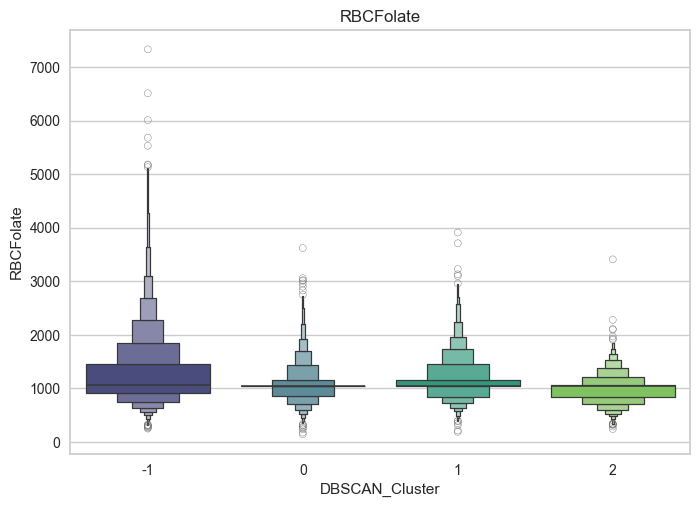

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\1791201658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=df[col], x=PCA_ds["DBSCAN_Cluster"], palette="viridis")


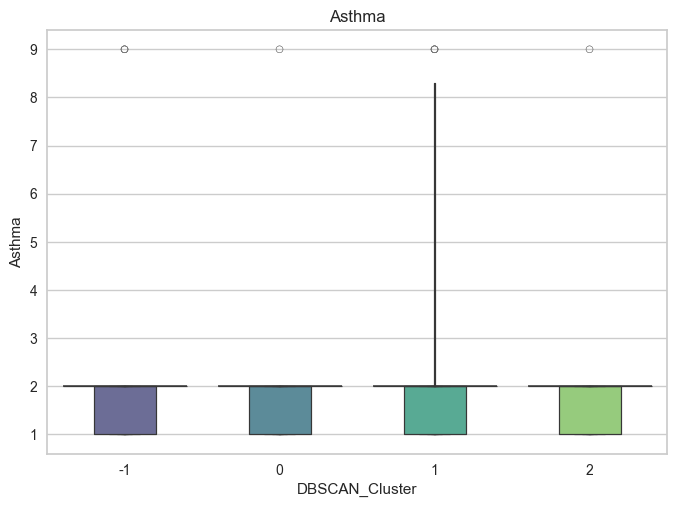

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\1791201658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=df[col], x=PCA_ds["DBSCAN_Cluster"], palette="viridis")


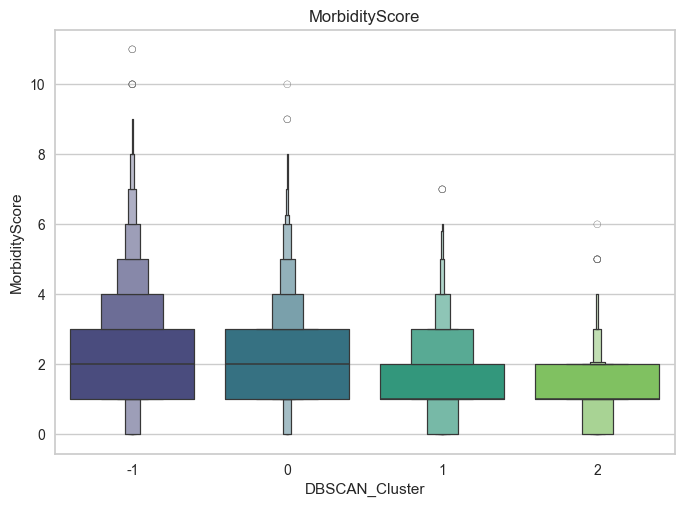

C:\Users\Vernon\AppData\Local\Temp\ipykernel_24148\1791201658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=df[col], x=PCA_ds["DBSCAN_Cluster"], palette="viridis")


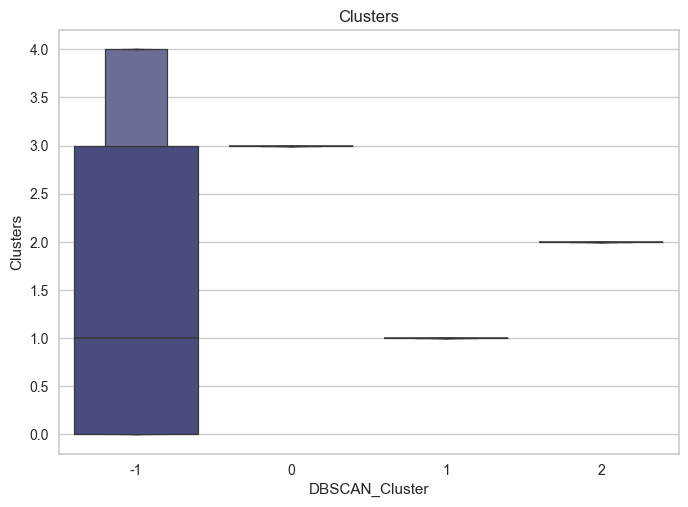

In [141]:
for col in df.columns:
  plt.figure()
  pl = sns.boxenplot(y=df[col], x=PCA_ds["DBSCAN_Cluster"], palette="viridis")
  pl.set_title(col)
  plt.show()


## Agglo 